# **Willkommen zur interaktiven Übung zum Thema "Pumpversuche"**

**Sebastian Gnann**


Bei Fragen und Feedback wenden Sie sich bitte an: sebastian.gnann@hydrologie.uni-freiburg.de

---

Diese Online-Übung basiert auf einem sogenannten Jupyter Notebook (https://jupyter.org/). 
Ein Notebook besteht aus einzelnen Zellen, die entweder Markdown-Text oder Python-Code beinhalten.

Bitte führen Sie das gesamte Notebook von Anfang an aus, damit alle Python-Module und die Daten in der richtigen Reihenfolge geladen werden.
Klicken Sie zunächst auf das Symbol "Restart the kernel". Dann können Sie jeden Abschnitt einzeln ausführen, indem Sie auf die entsprechende Zelle und dann auf das Symbol "Run the selected cell and advance" klicken (alternativ: Shift + Enter drücken). 
Sie können auch auf "Restart the kernel and run all cells" klicken, um das gesamte Notebook auszuführen. Dies sollte sicherstellen, dass alles in der richtigen Reihenfolge ausgeführt wird.

Nun können Sie sich Stück für Stück durch die Text- und Codezellen arbeiten. 

Sollten Sie länger inaktiv sein, kann es vorkommen, dass das Notebook nicht mehr richtig läuft (z.B. Nachricht "Kernel died unexpectedly"). Starten Sie in diesem Fall das Notebook einfach neu, am besten mit "Restart the kernel and run all cells". Sie können dann direkt zu dem Punkt zurückkehren, an dem Sie sich befanden, und müssen sich nicht erneut durch alle Zellen klicken. Sollte das Notebook gar nicht mehr laufen, dann laden Sie bitte den gesamten Link erneut.

Auf der linken Seite können Sie sich auch ein Inhaltsverzeichnis anzeigen lassen, indem Sie auf "Table of Contents" klicken. Das hilft beim Navigieren.

**Die Inhalte basieren teilweise auf der folgenden Ressource**

Miller, G. R. (2020). Jupyter Notebook for Computing the Well Function Using the Theis Equation, HydroShare, https://doi.org/10.4211/hs.df7f924575ab484986024f585b173e49

This resource is shared under the Creative Commons Attribution CC BY. 
http://creativecommons.org/licenses/by/4.0/ 

## Inhalt
### **Struktur der Übung**
- Die Theis'sche Brunnengleichung
- Auswertung eines instationären Pumpversuchs

<span style="color:DarkRed">
    
### **Lernziele**
Sie sollten verstehen:
- was die Theis Brunnengleichung berechnet
- wie instationäre Pumpversuche ausgewertet werden können

</span>

## Notwendige Python Packages
Es gibt verschieden sogenannte Packages für Python, die bestimme Funktionen ausführen. 
Manche Packages helfen beim Erstellen von Grafiken, andere erledigen bestimmte Rechenaufgaben (z.B. statistische Tests).
Diese müssen am Anfang importiert werden. Wird das nicht gemacht, kann der nachstehende Code nicht ausgeführt werden.

In [1]:
# import all necessary Python packages
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from contents import well_fxn_script as wf

# to suppress some warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Die Theis-Gleichung

## Parameter und Variablen:
- $t$ [s] = Zeit
- $r$ [m] = radialer Abstand zum Brunnen
- $h$ [m] = Standrohrspiegelhöhe zur Zeit $t$
- $h_0$ [m] = Standrohrspiegelhöhe zu Beginn der Wasserentnahme
- $s$ [m] = Absenkung der Standrohrspiegelhöhe ($h_0 - h$)
- $Q$ [m³/s] = Pumprate (entnommene Wassermenge pro Zeit)
- $b$ [m] = Aquifermächtigkeit
- $K$ [m/s] = hydraulische Leitfähigkeit
- $T$ [m²/s] = Transmissivität (für gespannte Verhältnisse $T = bK$)
- $S_s$ [1/m] = Spezifischer Speicherkoeffizient
- $S$ [-] = Speicherkoeffizient (für gespannte Verhältnisse $S = bS_s$)

Achtung: $t$ und $s$ unterscheiden sich von $T$ und $S$.

## Theis-Gleichung

Die Theis-Gleichung beschreibt die Absenkung aufgrund des Pumpens in einem gespannten Grundwasserleiter in Abhängigkeit der Aquifereigenschaften. 
Das nachstehende konzeptionelle Diagramm zeigt die allgemeine Brunnenkonfiguration und die relevanten Variablen.

<img src="contents/theis_diagram.gif" alt="theis_diagram" width="400"/>

Die Theis-Gleichung ermöglicht die indirekte Bestimmung von $T$ und $S$ aus der Absenkung $s$ des Beobachtungsbrunnens. Dieser befindet sich im Abstand $r$ zum Förderbrunnen, der mit bekannter (konstanter) Förderrate $Q$ betrieben wird. 

Die Bestimmung der Aquifereigenschaften kann über grafische Näherungsverfahren (match-point-Verfahren) erfolgen, indem die tatsächliche Absenkungs-Zeit-Kurve mit der theoretischen Brunnenfunktion $W(u)$ verglichen werden. Früher wurde das auf Papier gemacht, hier stellen wir das ganze digital nach.

Die Absenkung der Standrohrspiegelhöhe ($s = h_0 - h$) kann wie folgt berechnet werden (Theis-Gleichung):

$$s = \frac{Q}{4 \pi T} \int_{u}^{\infty} \frac{e^{-u} du}{u} = \frac{Q}{4 \pi T} W(u)$$

wobei $u$ wie folgt definiert ist:

$$u = \frac{r^2S}{4Tt}$$


## Quellen
Theis, C. V. (1935). The relation between the lowering of the piezometric surface and the rate and duration of discharge of a well using ground‐water storage. Eos, Transactions American Geophysical Union, 16(2), 519-524.

## Berechnung der Absenkung mit bekannten Aquifereigenschaften

Um zu verstehen, was die Theis-Gleichung macht, können wir Aquifereigenschaften definieren und die Gleichung lösen.

Wir nehmen folgende Werte an
- $S_s$ = 1.0e-7 1/m
- $K$ = 4.0e-5 m/s
- $b$ = 100.0 m

Daraus ergeben sich
- $S = bS_s$ = 100 m 1.0e-5 1/m = 1.0e-5
- $T = bK$ = 100 m 4.0e-5 m/s = 4.0e-3 m²/s

Die Pumprate ist $Q$ = 0.1 m³/s.

Im folgenden schauen wir uns den zeitlichen Verlauf an drei verschiedenen Abständen $r_1$, $r_2$ und $r_3$ an.
Beide Axen werden logarithmisch angezeigt.

<span style="color:Indigo">**Frage**: *Wie hängt die Absenkkurve vom Radius ab?*</span>


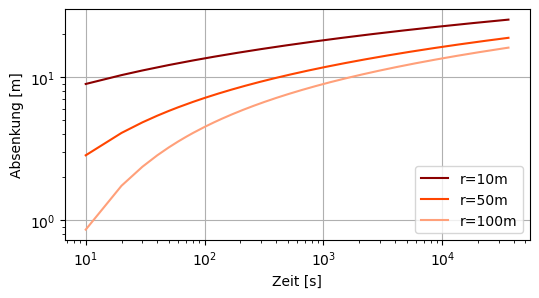

In [2]:
# calculate solution to Theis equation and visualize it

# define aquifer properties
S = 1.0e-5 # [-]
T = 4.0e-3 # [m²/s]
Q = 0.1 # [m³/s]

# define three radial distances [m]
r1 = 10  
r2 = 50 
r3 = 100 

# define time vector [s]
t = np.arange(10,3600*10,10) 

# calculate u for different radial distances
u1 = ((r1**2)*S)/(4*T*t)
u2 = ((r2**2)*S)/(4*T*t)
u3 = ((r3**2)*S)/(4*T*t)

# define tolerance range (needed for solution of well equation) 
tol = 1e-12

# solve well equation (this is done by calling a function)
from contents import well_fxn_script as wf

s_r1 = np.asarray(list(map(lambda u1: wf.well_fxn(u1,tol)*Q/(4*T*np.pi),u1)))
s_r2 = np.asarray(list(map(lambda u2: wf.well_fxn(u2,tol)*Q/(4*T*np.pi),u2)))
s_r3 = np.asarray(list(map(lambda u3: wf.well_fxn(u3,tol)*Q/(4*T*np.pi),u3)))

# visualize results
# also note that we look at a double log scale
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(t, s_r1, '-', c='darkred', label='r=10m')
ax.plot(t, s_r2, '-', c='orangered', label='r=50m')
ax.plot(t, s_r3, '-', c='lightsalmon', label='r=100m')
ax.set_xlabel('Zeit [s]')
ax.set_ylabel('Absenkung [m]')
ax.legend(loc='lower right')
#plt.gca().invert_yaxis() # invert axis to see drawdown more intuitively
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.show()

## Auswertung eines Pumpversuches mit der Theis-Gleichung

Die untere Grafik zeigt die Brunnenfunktion $W(u)$ in Abhängigkeit von $1/u$. 
Diese Funktion stellt einen idealisierten Verlauf der Absenkung dar, an die man nun reale Messdaten angleichen kann.
Es wird häufig $1/u$ aufgetragen, da $1/u$ direkt proportional zu $t$ ist. 
Zudem werden beide Axen meistens logarithmiert dargestellt.

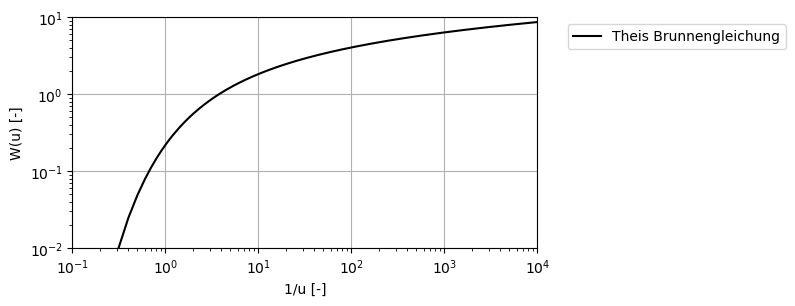

In [3]:
# calculate and plot Theis well function

# define values for 1/u
u = 1/np.arange(0.1,10000,0.1)

# define tolerance range (needed for solution of well equation) 
tol = 1e-12

# solve well equation (this is done by calling a function)
W = list(map(lambda u: wf.well_fxn(u,tol),u))

# visualize results
#  note that we look at a double log scale
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(1/u, W, '-', c='black', label='Theis Brunnengleichung')
ax.set_xlabel('1/u [-]')
ax.set_ylabel('W(u) [-]')
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([0.1, 10000])
ax.set_ylim([0.01, 10])
#ax.legend(loc='lower right')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.grid()
plt.show()

## Angleichung von Messdaten an Theis Brunnenfunktion
Um einen Pumpversuch auszuwerten, können wir nun die Theis-Brunnenfunktion an die gemessenen Daten angleichen.
Traditionell wurde das von Hand gemacht, indem ein durchsichtiges Blatt mit den Messdaten auf ein Blatt mit der Brunnenfunktion gelegt wurde und so lange verschoben wurde, bis eine optimale Übereinstimmung gefunden wurde. 
Hier erledigen wir das digital, aber trotzdem manuell. 
Das heißt wir verschieben eine Kurve mittels eines interaktiven Reglers (s. unten).

Zuerst laden wir aber die Daten des Pumpversuchs ein. 
Diese bestehen aus der Pumprate, dem Abstand des Beobachtungsbrunnens zum Förderbrunnen, sowie der Zeit und der dazugehörigen Absenkung.

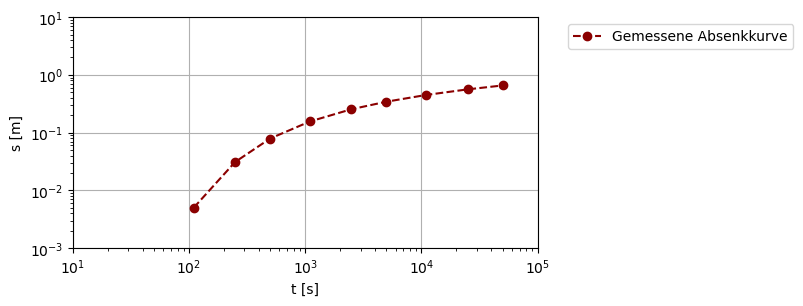

In [4]:
# load data from pumping test

# pumping rate and radius
Q = 4e-3 # [m³/s]
r = 55 # [m]

# time and drawdown
t_obs = np.array([110, 250, 500, 1100, 2500, 5000, 11000, 25000, 50000]) # [s]
s_obs = np.array([0.005, 0.031, 0.079, 0.156, 0.254, 0.343, 0.449, 0.561, 0.656]) # [m]

# visualize data
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(t_obs, s_obs, 'o--', c='darkred', label='Gemessene Absenkkurve')
ax.set_xlabel('t [s]')
ax.set_ylabel('s [m]')
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([10, 100000])
ax.set_ylim([0.001, 10])
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.grid()    

## Berechnung von $T$ und $S$

Wie aus den Gleichungen erkennbar ist, hängt $W(u)$ mit $s$ zusammen und $1/u$ mit $t$:
$$ W(u) = \frac{4 \pi T}{Q} s $$
$$ \frac{1}{u} = \frac{4T}{Sr^2} t $$ 

Dieser Zusammenhang ist jeweils linear und hängt nur von Konstanten ab, die sich für den jeweiligen Pumpversuch bzw. Aquifer nicht verändern.

Ziel des sogenannten "Match Point"-Verfahrens ist es un, die gemessene Absenkkurve an die idealisierte Brunnenfunktion anzugleichen.
Danach kann man sich die obigen Gleichungen zunutze machen und $T$ sowie $S$ berechnen. 
Der "Match Point" ist ein Punkt, an dem die Werte für $s$ und $t$ abgelesen werden.
Häufig wählt man einen Punkt, der die spätere Rechnung vereinfacht, z.B. $W(u)=1$ und $1/u=1$, hier angezeigt durch die graue gestrichelte Linie.

<span style="color:Indigo">**Aufgabe**: *Passen Sie die gemessene Absenkkurve mithilfe der Slider an die Theis'sche Brunnenkurve an.*</span>


In [5]:
# calculate solution to Theis equation and visualize it

# define values for 1/u
u = 1/np.arange(0.1,10000,0.1)

# define tolerance range (needed for solution of well equation) 
tol = 1e-12

# solve well equation (this is done by calling a function)
W = list(map(lambda u: wf.well_fxn(u,tol),u))

def f(t=1.0, s=1.0):
    
    # visualize results
    # also note that we look at a double log scale
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.axhline(y=1, color='grey', linestyle='--')
    ax.axvline(x=1, color='grey', linestyle='--')
    ax.plot(1/u, W, '-', c='black', label='Theis Brunnengleichung')
    ax.plot(t_obs, s_obs, 'o--', c='grey', label='Gemessene Absenkkurve')
    ax.plot(t_obs/t, s_obs/s, 'o--', c='darkred', label='Verschobene Absenkkurve')
    ax.set_xlabel('1/u [-]')
    ax.set_ylabel('W(u) [-]')
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim([0.1, 10000])
    ax.set_ylim([0.01, 10])
    ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    ax.grid()
    plt.show()


widgets.interact(f, t=(1,1000.0,1.0), s=(0.01,1.0,0.01))

%matplotlib inline

interactive(children=(FloatSlider(value=1.0, description='t', max=1000.0, min=1.0, step=1.0), FloatSlider(valu…

## Berechnung 
Nachdem die gemessene Kurve "optimal" verschoben wurde (es geht in der Praxis nie ganz perfekt), erhält man je einen Wert für $t$ und $s$.
Aus den obigen Gleichungen kann man nun $T$ und $S$ berechnen.
Da wir unseren "Match Point" so gewählt haben, dass $W(u)$ und $u$ gleich 1 sind, vereinfachen sich die Gleichungen.

$$ 1 = \frac{4 \pi T}{Q} s $$
$$ 1 = \frac{4T}{Sr^2} t $$ 

Diese können wie folgt umgestellt werden:

$$ T = \frac{Q}{4 \pi s} $$
$$ S = \frac{4T}{r^2} t $$ 

In der oberen Gleichung gibt es nur noch eine Unbekannte, nämlich die Transmissivität $T$, die wur nun berechnen können.
Die untere Gleichung enthält sowohl $T$ als auch den Speicherkoeffizienten $S$.
Da wir $T$ bereits berechnet haben, können wir nun auch $S$ berechenen.

Das folgende Skript macht dies automatisch, Sie müssen nur die Werte für $T$ und $S$ eingeben.

<span style="color:Indigo">**Aufgabe**: *Berechnen Sie mit den oben ermittelten Werten für $s$ und $t$ die Transmissivität sowie den Speicherkoeffizienten.*</span>


In [9]:
# calculate T and S by entering the estimated values for t and s

def calculate_aquifer_properties(b):
    s = float_text1.value
    t = float_text2.value
    T = 1 * Q/(4*np.pi*s) # calculate T
    S = 1 * 4*T/r**2*t # calculate S
    with output:
        output.clear_output()  # clear previous outputs
        print("T = " + '{:.1e}'.format(T) + " m²/s")
        print("S = " + '{:.1e}'.format(S) + " [-]")

# create a FloatText widget for decimal numbers
float_text1 = widgets.FloatText(value=0.0, description='Wert für $s$:')

float_text2 = widgets.FloatText(value=0.0, description='Wer für $t$:')

# create button and display result
button = widgets.Button(description="Calculate")
output = widgets.Output()
button.on_click(calculate_aquifer_properties)
display(float_text1, float_text2, button, output)

FloatText(value=0.0, description='Wert für $s$:')

FloatText(value=0.0, description='Wer für $t$:')

Button(description='Calculate', style=ButtonStyle())

Output()

## Einordnung der Ergebnisse
Wir haben also mithilfe eines Pumpversuches den spezifischen Speicher und die Transmissivität berechnet.
Diese könnten z.B. später in einem Modell benutzt werden, das die Grundwasserströmung berechnet.

<span style="color:Indigo">**Frage**: *Um was für einen Aquifer könnte es sich aufgrund der Transmissivität handeln, wenn wir eine Mächtigkeit von 100m annehmen?*</span>

## Schlussfolgerung
In der Realität enstprechen nicht alle Absenkungskurven der Idealform der Theis'schen Brunnenformel. 
Dies hängt häufig damit zusammen, dass der Aquifer von Idealbedingungen abweicht, z.B. weil eine "Infiltrationsgrenze" wie beispielsweise ein Fluss in der Nähe ist ,der zusätzlich Wasser liefert. Solche Ausnahmen besprechen wir im Folgeteil der Vorlesung.